In [2]:
import pandas as pd
import os
import seaborn as sns

df = pd.DataFrame()

files = os.listdir("data")

for file in files:
    df = pd.concat([df, pd.read_excel("data/" + file)])
df.reset_index(drop=True, inplace=True)
df.drop(columns=["Unnamed: 10"], inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Method name,N,Mean,CV,Sample,Reference Value,Year,Source,Type,Bias
0,Abbott Architect c System,210,9.28,1.5,GH5-11,9.37,2018,CAP,Fresh,-0.09
1,Alere Afinion AS100,150,9.22,1.8,GH5-11,9.37,2018,CAP,Fresh,-0.15
2,ARKRAY Adams HA-8180 series,21,9.34,1.5,GH5-11,9.37,2018,CAP,Fresh,-0.03
3,Beckman AU Systems - Beckman\nreagent,89,9.04,3.7,GH5-11,9.37,2018,CAP,Fresh,-0.33
4,Beckman UniCel DxC Synchron\nSystems,93,9.35,2.1,GH5-11,9.37,2018,CAP,Fresh,-0.02
...,...,...,...,...,...,...,...,...,...,...
2583,Siemens Dimension Vista,300,5.54,2.8,GH5-15,5.45,2017,CAP,Fresh,0.09
2584,Siemens Dimension Xpand,26,5.56,3.2,GH5-15,5.45,2017,CAP,Fresh,0.11
2585,Tosoh G8 Auto HPLC,378,5.54,1.4,GH5-15,5.45,2017,CAP,Fresh,0.09
2586,Trinity Biotech Premier,79,5.55,2.4,GH5-15,5.45,2017,CAP,Fresh,0.1


In [3]:
import matplotlib.pyplot as plt

bias_df = df.copy()

bias_df = bias_df[["Method name", "Bias", "Year"]]
bias_df = bias_df[bias_df["Bias"] != "-"]


<AxesSubplot:title={'center':'Bias over the years'}, xlabel='Year', ylabel='Bias'>

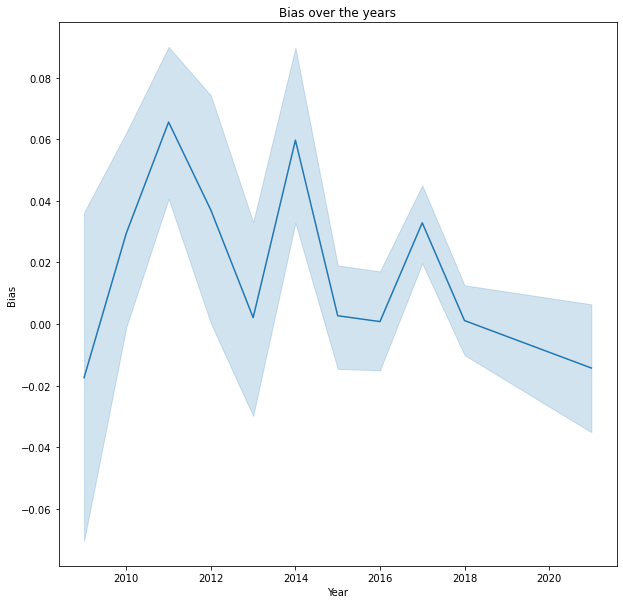

In [4]:
plt.figure(figsize=(10, 10))
plt.title("Bias over the years")

sns.lineplot(x="Year", y="Bias", data=bias_df, legend=False)

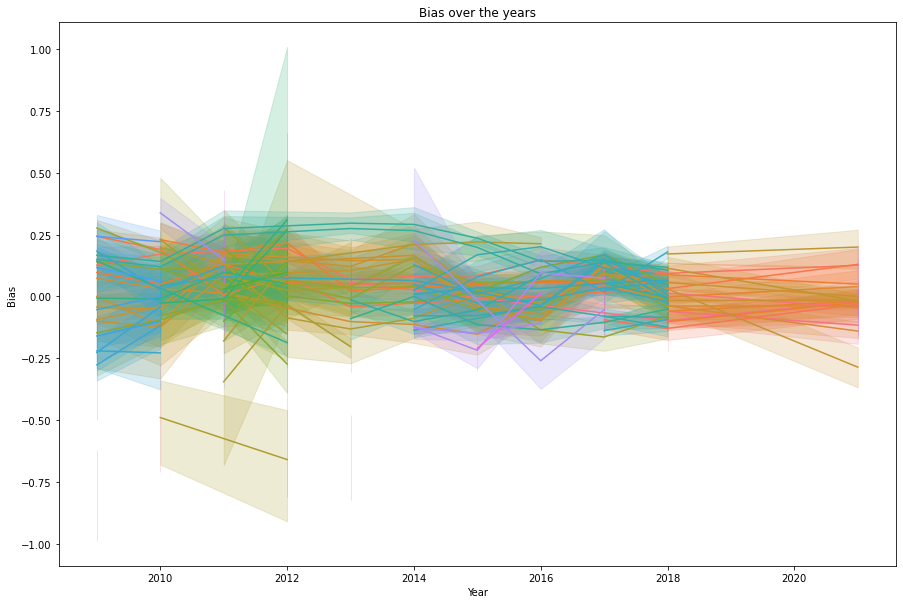

In [13]:
plt.figure(figsize=(15, 10))
plt.title("Bias over the years")

sns.lineplot(x="Year", y="Bias", data=bias_df, hue="Method name", legend=False)

plt.savefig("bias.png", dpi=150)